In [42]:
import pandas as pd
import dgl
import networkx as nx

file = "/home/santiagovargas/dev/qtaim_generator/data/xyz/molecule_complete.pkl"
df = pd.read_pickle(file)
names_list = list(df.names)


dict_base = {}
for name in names_list:
    basename = name[:-14]
    # print(basename)
    if basename not in dict_base.keys():
        dict_base[basename] = {"names": [], "graphs": {}}
    dict_base[basename]["names"].append(name)

# sort each list

for keys in dict_base.keys():
    dict_base[keys]["names"].sort()

for keys in dict_base.keys():
    if len(dict_base[keys]["names"]) > 2:
        # remove all but the first and last
        dict_base[keys]["names"] = [
            dict_base[keys]["names"][0],
            dict_base[keys]["names"][-1],
        ]
# filter df to only have rows with names in the list
df = df[
    df.names.isin([item for sublist in dict_base.values() for item in sublist["names"]])
]

In [43]:
df

,molecule,molecule_graph,bonds,ids,names,extra_feat_atom_Lagrangian_K,extra_feat_atom_Hamiltonian_K,extra_feat_atom_e_density,extra_feat_atom_lap_e_density,extra_feat_atom_e_loc_func,...,extra_feat_bond_esp_nuc,extra_feat_bond_esp_e,extra_feat_bond_esp_total,extra_feat_bond_grad_norm,extra_feat_bond_lap_norm,extra_feat_bond_eig_hess,extra_feat_bond_det_hessian,extra_feat_bond_ellip_e_dens,extra_feat_bond_eta,extra_feat_bond_indices_qtaim
5,"[[5.6307 4.8612 4.4591] Pt, [5.3611 5.1801 6.7...",Molecule Graph\nMolecule: \nFull Formula (H1 P...,"[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4...",5,2-S4_H1_Pt1_stay_run2_00_POSCAR.xyz,"[286822171.20000005, 286887086.3, 286812249.1,...","[5523507884000.0, 5523538750000.0, 55235212620...","[-5523507884000.0, -5523538750000.0, -55235212...","[-22092884220000.0, -22093007450000.0, -220929...","[0.9999970767, 0.9999970756, 0.9999970771, 0.9...",...,"[[175.5211966, 179.1674378, 179.1639942, 177.5...","[[-170.5283626, -174.5432459, -174.5406746, -1...","[[4.815491534, 4.624191947, 4.623319593, 4.414...","[[7.040071455e-15, 3.437437005e-15, 5.04533382...","[[7.47519837, 6.675479465, 6.676418259, 6.6922...","[[7.475198367000001, 6.675479468000001, 6.6764...","[[181.6054019, 128.889318, 128.775246, 109.634...","[[0.063472, 0.065797, 0.066143, 0.031097, 0.03...","[[0.249289, 0.250607, 0.250579, 0.237894, 0.23...","[[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, ..."
7,"[[5.6307 4.8612 4.4591] Pt, [5.3611 5.1801 6.7...",Molecule Graph\nMolecule: \nFull Formula (H1 P...,"[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4...",7,2-S4_H1_Pt1_stay_00_POSCAR.xyz,"[286822171.20000005, 286887086.3, 286812248.9,...","[5523507884000.0, 5523538747000.0, 55235212630...","[-5523507884000.0, -5523538747000.0, -55235212...","[-22092884220000.0, -22093007440000.0, -220929...","[0.9999970767, 0.9999970756, 0.9999970771, 0.9...",...,"[[175.5211966, 179.1674393, 179.1639951, 177.5...","[[-170.5283626, -174.5432478, -174.5406761, -1...","[[4.815491534, 4.624191479, 4.623319005, 4.414...","[[7.040071455e-15, 7.926497563e-15, 5.68527648...","[[7.47519837, 6.675479206, 6.676419044, 6.6922...","[[7.475198367000001, 6.675479210000001, 6.6764...","[[181.6054019, 128.8892756, 128.7751972, 109.6...","[[0.063472, 0.065798, 0.066143, 0.031097, 0.03...","[[0.249289, 0.250607, 0.250579, 0.237893, 0.23...","[[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, ..."
13,"[[5.4483 4.5201 4.3842] Pt, [6.0525 5.3373 6.7...",Molecule Graph\nMolecule: \nFull Formula (H1 P...,"[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4...",13,2-S4_H1_Pt1_stay_07_POSCAR.xyz,"[286822171.20000005, 286791750.3, 286819026.7,...","[5523507884000.0, 5523434886000.0, 55235175430...","[-5523507884000.0, -5523434886000.0, -55235175...","[-22092884220000.0, -22092592380000.0, -220929...","[0.9999970767, 0.9999970773, 0.9999970769, 0.9...",...,"[[175.5211966, 172.8858431, 175.5211966, 176.6...","[[-170.5283626, -167.2877922, -170.5283626, -1...","[[4.815491534, 5.598050938, 4.815491534, 4.365...","[[7.040071455e-15, 4.15027784e-15, 7.040071455...","[[7.47519837, 7.974967649, 7.47519837, 7.77176...","[[7.475198367000001, 7.974967648999998, 7.4751...","[[181.6054019, 297.8453234, 181.6054019, 119.5...","[[0.063472, 0.038866, 0.063472, 0.070469, 0.09...","[[0.249289, 0.262948, 0.249289, 0.223411, 0.24...","[[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, ..."
33,"[[3.5658 4.0373 4.6534] Pt, [4.5547 4.8073 6.8...",Molecule Graph\nMolecule: \nFull Formula (H1 P...,"[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4...",33,4_H_Pt1-bridge_opp_09_POSCAR.xyz,"[286822171.20000005, 286793179.3, 286824254.0,...","[5523507884000.0, 5523454399000.0, 55235041290...","[-5523507884000.0, -5523454399000.0, -55235041...","[-22092884220000.0, -22092670420000.0, -220928...","[0.9999970767, 0.9999970773, 0.9999970768, 0.9...",...,"[[175.5211966, 173.2419809, 175.5211966, 179.7...","[[-170.5283626, -167.6443998, -170.5283626, -1...","[[4.815491534, 5.59758115, 4.815491534, 4.7729...","[[7.040071455e-15,

In [44]:
dict_base

{'2-S4_H1_Pt1_stay_run2': {'names': ['2-S4_H1_Pt1_stay_run2_00_POSCAR.xyz',
   '2-S4_H1_Pt1_stay_run2_07_POSCAR.xyz'],
  'graphs': {}},
 '4_H_Pt1-bridge': {'names': ['4_H_Pt1-bridge_00_POSCAR.xyz',
   '4_H_Pt1-bridge_09_POSCAR.xyz'],
  'graphs': {}},
 '2-S4_H1_Pt1_stay': {'names': ['2-S4_H1_Pt1_stay_00_POSCAR.xyz',
   '2-S4_H1_Pt1_stay_07_POSCAR.xyz'],
  'graphs': {}},
 '4_H_Pt1-bridge_opp': {'names': ['4_H_Pt1-bridge_opp_00_POSCAR.xyz',
   '4_H_Pt1-bridge_opp_09_POSCAR.xyz'],
  'graphs': {}},
 '2-S4_H1_Pt1_stay_run1': {'names': ['2-S4_H1_Pt1_stay_run1_00_POSCAR.xyz',
   '2-S4_H1_Pt1_stay_run1_09_POSCAR.xyz'],
  'graphs': {}}}

In [45]:
def build_networkx_graph(
    row,
    attr_atom=[
        "extra_feat_atom_esp_e",
        "extra_feat_atom_esp_total",
    ],
    attr_bond=["extra_feat_bond_esp_total", "extra_feat_bond_eta"],
):
    bonds = list(row["bonds"])
    num_bonds = len(bonds)
    num_atoms = len(row["molecule_graph"])

    G = nx.Graph()
    G.add_nodes_from(range(num_atoms))
    G.add_edges_from(bonds)

    def _add_node_attrs(G, attr, attr_ind, val, as_str=False):
        for ind, n in enumerate(G.nodes()):
            if G.nodes[n] == {}:
                G.nodes[n]["feature"] = {}

            if as_str:
                G.nodes[n]["feature"][attr] = float(val[ind])
            else:
                G.nodes[n]["feature"][attr_ind] = float(val[ind])

    def _add_bond_attrs(G, attr, attr_ind, vals, bond_ordering, as_str=False):
        bonds_order_as_tuple = [tuple(b) for b in bond_ordering[0]]
        # zip list of tuples with list vals
        dict_attrs = {
            edge: float(val) for edge, val in zip(bonds_order_as_tuple, vals[0])
        }
        # convert to all features being in key "feature"
        for edge in dict_attrs.keys():
            if G.edges[edge] == {}:
                G.edges[edge]["feature"] = {}
            if as_str:
                G.edges[edge]["feature"][attr] = dict_attrs[edge]
            else:
                G.edges[edge]["feature"][attr_ind] = dict_attrs[edge]
        # if as_str:
        #    nx.set_edge_attributes(G, dict_attrs, attr)
        # else:
        #    nx.set_edge_attributes(G, dict_attrs, attr_ind)

    bond_list = row.extra_feat_bond_indices_qtaim
    [
        _add_node_attrs(G, attr, ind + 1, row[attr], as_str=False)
        for ind, attr in enumerate(attr_atom)
    ]

    [
        _add_bond_attrs(G, attr, ind + 1, row[attr], bond_list, as_str=False)
        for ind, attr in enumerate(attr_bond)
    ]

    # show atom atrributes
    print(G.nodes[2])
    print(G.edges[(1, 2)])
    print("-" * 30)
    return G

In [46]:
# add graphs to dict_base
for index, row in df.iterrows():
    basename = row["names"][:-14]

    dict_base[basename]["graphs"][row["names"]] = build_networkx_graph(row)

{'feature': {1: -694.7096938, 2: 265625375800.0}}
{'feature': {1: 4.414713776, 2: 0.237894}}
------------------------------
{'feature': {1: -694.7096952, 2: 265625375800.0}}
{'feature': {1: 4.414712202, 2: 0.237893}}
------------------------------
{'feature': {1: -693.7800713, 2: 387549898800.0}}
{'feature': {1: 4.365150003, 2: 0.223411}}
------------------------------
{'feature': {1: -694.0091915, 2: 374188270000.0}}
{'feature': {1: 4.772958261, 2: 0.236908}}
------------------------------
{'feature': {1: -693.595221, 2: 347429390800.0}}
{'feature': {1: 4.341486501, 2: 0.220478}}
------------------------------
{'feature': {1: -693.7800713, 2: 387549898800.0}}
{'feature': {1: 4.365150003, 2: 0.223411}}
------------------------------
{'feature': {1: -693.5957523, 2: 347516114600.0}}
{'feature': {1: 4.341492852, 2: 0.220477}}
------------------------------
{'feature': {1: -134.5217757, 2: 41.29945966}}
{'feature': {1: 4.815491534, 2: 0.249289}}
------------------------------
{'feature': 

In [83]:
from copy import deepcopy
import numpy as np


def test_difference_nodes(a_feat, b_feat, diff_feat):
    # dict_base[key]["graphs"][name_a].nodes(data=True)
    # dict_base[key]["graphs"][name_b].nodes(data=True)
    for ind, node in enumerate(diff_feat):
        a_node = a_feat[ind]
        b_node = b_feat[ind]
        for key in node[1]["feature"]:
            diff_manual = b_node["feature"][key] - a_node["feature"][key]

            assert np.allclose(
                node[1]["feature"][key],
                diff_manual,
            ), print(
                "difference not equal: {} vs. {}".format(
                    node[1]["feature"][key], diff_manual
                )
            )


def networkx_edge_feat_to_dict(edges):
    # print(edges)
    dict_ret = {}
    for edge in edges:
        dict_ret[edge[0], edge[1]] = edge[2]
    return dict_ret


def test_difference_edges(a_feat, b_feat, diff_feat):
    # dict_base[key]["graphs"][name_a].nodes(data=True)
    # dict_base[key]["graphs"][name_b].nodes(data=True)
    # convert to dict for easier access
    a_feat_trans = networkx_edge_feat_to_dict(list(a_feat))
    b_feat_trans = networkx_edge_feat_to_dict(list(b_feat))
    dict_feat_trans = networkx_edge_feat_to_dict(list(diff_feat))
    # print(a_feat_trans)
    for node in dict_feat_trans.keys():
        if node not in a_feat_trans.keys():
            a_feat_temp["feature"] = {
                i: 0 for i in dict_feat_trans[node]["feature"].keys()
            }
        else:
            a_feat_temp = a_feat_trans[node]
        if node not in b_feat_trans.keys():
            b_feat_temp["feature"] = {
                i: 0 for i in dict_feat_trans[node]["feature"].keys()
            }
        else:
            b_feat_temp = b_feat_trans[node]
        # print(dict_feat_trans[node], a_feat_temp, b_feat_temp)

        for key in dict_feat_trans[node]["feature"]:
            diff_manual = b_feat_temp["feature"][key] - a_feat_temp["feature"][key]
            assert np.allclose(
                dict_feat_trans[node]["feature"][key],
                diff_manual,
            ), print(
                "difference not equal: {} vs. {}".format(
                    node[1]["feature"][key], diff_manual
                )
            )
        # print(a_feat_temp)
        # print(b_feat_temp)
        # print(node)


# subtract features between graphs
def subtract_graphs_networkx(graph_a, graph_b):
    # create new graph
    graph_ret = deepcopy(graph_a)
    edges_nonoverlap = graph_ret.edges() - graph_b.edges()
    # add edges that are in graph2 but not in graph1
    # print(edges_nonoverlap)
    graph_ret.add_edges_from(edges_nonoverlap)

    # subtract node features
    for node in graph_ret.nodes():
        for key in graph_ret.nodes[node]["feature"].keys():
            graph_ret.nodes[node]["feature"][key] = (
                graph_ret.nodes[node]["feature"][key]
                - graph_b.nodes[node]["feature"][key]
            )

    # subtract edge features
    for edge in graph_ret.edges():
        for key in graph_ret.edges[edge]["feature"].keys():
            if edge in graph_b.edges():
                graph_ret.edges[edge]["feature"][key] = (
                    graph_ret.edges[edge]["feature"][key]
                    - graph_b.edges[edge]["feature"][key]
                )

    return graph_ret


# add subtracted graphs to dict_base
for key in dict_base.keys():
    name_b = dict_base[key]["names"][1]
    name_a = dict_base[key]["names"][0]

    dict_base[key]["graphs"]["diff_graph"] = subtract_graphs_networkx(
        dict_base[key]["graphs"][name_b],
        dict_base[key]["graphs"][name_a],
    )

    test_val_bond_diff = dict_base[key]["graphs"]["diff_graph"].edges()[(1, 2)]
    test_val_bond_a = dict_base[key]["graphs"][name_a].edges()[(1, 2)]
    test_val_bond_b = dict_base[key]["graphs"][name_b].edges()[(1, 2)]

    diff_feat = dict_base[key]["graphs"]["diff_graph"].nodes(data=True)
    a_feat = dict_base[key]["graphs"][name_a].nodes(data=True)
    b_feat = dict_base[key]["graphs"][name_b].nodes(data=True)
    diff_bond_feat = dict_base[key]["graphs"]["diff_graph"].edges(data=True)
    a_bond_feat = dict_base[key]["graphs"][name_a].edges(data=True)
    b_bond_feat = dict_base[key]["graphs"][name_b].edges(data=True)
    # print(diff_bond_feat.keys())
    test_difference_nodes(a_feat, b_feat, diff_feat)
    test_difference_edges(a_bond_feat, b_bond_feat, diff_bond_feat)

In [84]:
nx_graphs_attr = [dict_base[key]["graphs"]["diff_graph"] for key in dict_base.keys()]
from karateclub import FeatherGraph, Graph2Vec, GL2Vec, WaveletCharacteristic

model = Graph2Vec(attributed=True)
model.fit(nx_graphs_attr)
X = model.get_embedding()

/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0.28823265 0.2750566 ]


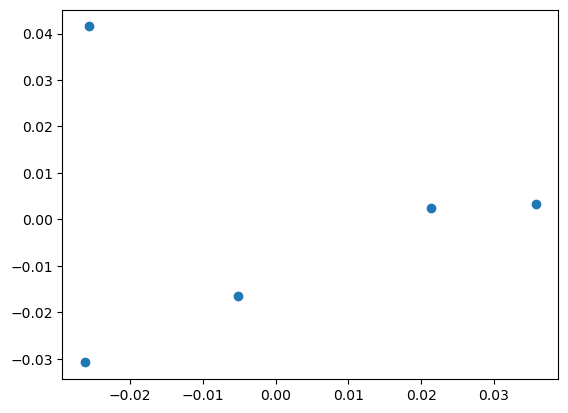

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)


import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/santiagovargas/anaconda3/envs/qtaim_embed/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/santiagovargas/anaconda3/envs/qtaim_em

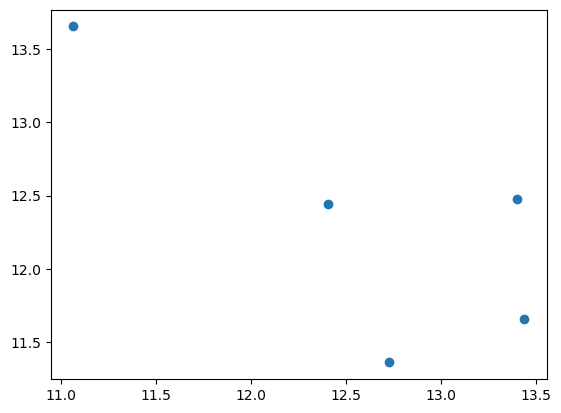

In [87]:
import umap

x_trans = umap.UMAP(n_neighbors=2).fit_transform(X)

plt.scatter(x_trans[:, 0], x_trans[:, 1])
plt.show()